In [1]:
from matplotlib import pyplot as plt
from IPython import display
from PIL import Image
import numpy as np
import cv2

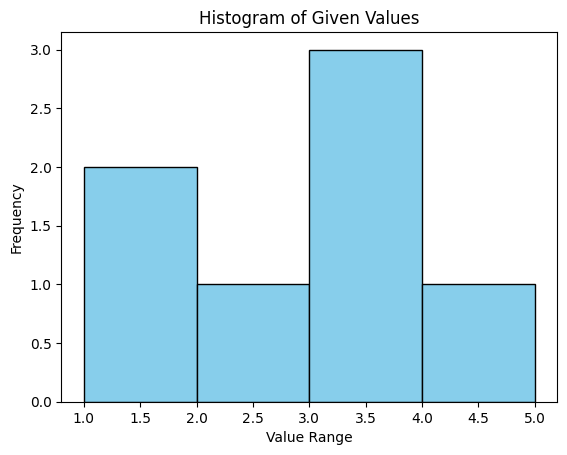

In [2]:
# Task 2 — Plot the Histograms
import numpy as np
from matplotlib import pyplot as plt

# Given data
values = [1, 1.5, 2.2, 3.5, 3.5, 3.6, 4.1]

# Plot histogram with 4 bins and range 1–5
plt.hist(values, bins=4, range=(1, 5), color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Histogram of Given Values")
plt.xlabel("Value Range")
plt.ylabel("Frequency")

# Show plot
plt.show()


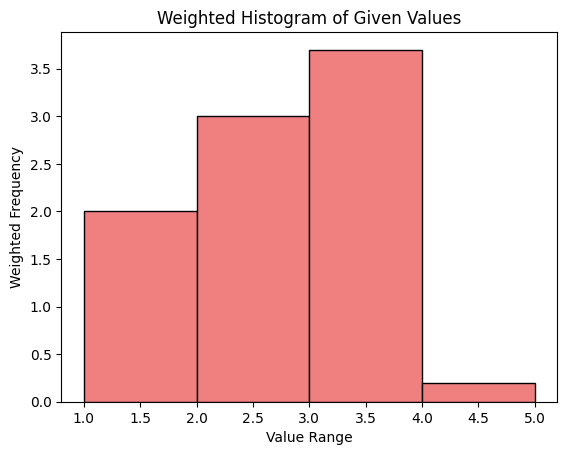

In [3]:
# Task 3 — Plot Weighted Histograms
import numpy as np
from matplotlib import pyplot as plt

# Given data
values = [1, 1.5, 2.2, 3.5, 3.5, 3.6, 4.1]
weights = [1., 1., 3., 1.2, 1.4, 1.1, 0.2]

# Plot weighted histogram
plt.hist(values, bins=4, range=(1, 5), weights=weights, color='lightcoral', edgecolor='black')

# Add labels and title
plt.title("Weighted Histogram of Given Values")
plt.xlabel("Value Range")
plt.ylabel("Weighted Frequency")

# Show plot
plt.show()


In [4]:
# Task 4 — Preparing an Array to Demonstrate HOG
import numpy as np

# Create a sample 'cell' array (8x8) representing part of an image
cell = np.array([
    [0, 1, 2, 5, 5, 5, 5, 5],
    [0, 0, 1, 4, 4, 5, 5, 5],
    [0, 0, 1, 3, 4, 5, 5, 5],
    [0, 0, 0, 1, 2, 3, 5, 5],
    [0, 0, 0, 0, 1, 2, 5, 5],
    [0, 0, 0, 0, 1, 3, 5, 5],
    [0, 0, 0, 0, 0, 2, 5, 5],
    [0, 0, 0, 0, 0, 1, 3, 5]
], dtype='float64')

# Display the cell
print("Cell array representing a small window of the image:")
print(cell)


Cell array representing a small window of the image:
[[0. 1. 2. 5. 5. 5. 5. 5.]
 [0. 0. 1. 4. 4. 5. 5. 5.]
 [0. 0. 1. 3. 4. 5. 5. 5.]
 [0. 0. 0. 1. 2. 3. 5. 5.]
 [0. 0. 0. 0. 1. 2. 5. 5.]
 [0. 0. 0. 0. 1. 3. 5. 5.]
 [0. 0. 0. 0. 0. 2. 5. 5.]
 [0. 0. 0. 0. 0. 1. 3. 5.]]


In [5]:
# Task 5 — Gradients, magnitude, and angle for HOG
import cv2
import numpy as np

# Use the 8×8 'cell' from Task 4
# (if not in memory, paste the array definition from Task 4 here)

# 1) Compute gradients with Sobel (x = horizontal change, y = vertical change)
gx = cv2.Sobel(cell, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)  # ∂I/∂x
gy = cv2.Sobel(cell, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)  # ∂I/∂y

# 2) Convert to magnitude and angle
mag, ang_deg = cv2.cartToPolar(gx, gy, angleInDegrees=True)

# HOG typically uses *unsigned* orientations in [0, 180)
ang_deg = np.mod(ang_deg, 180.0)

# (Optional) Inspect a few values
print("gx:\n", np.round(gx, 2))
print("gy:\n", np.round(gy, 2))
print("magnitude:\n", np.round(mag, 2))
print("angle (deg, 0–180):\n", np.round(ang_deg, 1))


gx:
 [[ 0.  6. 16. 12.  2.  2.  0.  0.]
 [ 0.  5. 15. 12.  4.  3.  0.  0.]
 [ 0.  3. 11. 11.  7.  6.  2.  0.]
 [ 0.  1.  5.  8.  8. 11.  7.  0.]
 [ 0.  0.  1.  5.  9. 15. 10.  0.]
 [ 0.  0.  0.  3. 10. 17. 10.  0.]
 [ 0.  0.  0.  1.  8. 17. 12.  0.]
 [ 0.  0.  0.  0.  6. 16. 14.  0.]]
gy:
 [[  0.   0.   0.   0.   0.   0.   0.   0.]
 [ -2.  -3.  -5.  -6.  -4.  -1.   0.   0.]
 [  0.  -1.  -5.  -9.  -9.  -6.  -2.   0.]
 [  0.  -1.  -5. -10. -12.  -9.  -3.   0.]
 [  0.   0.  -1.  -3.  -3.  -1.   0.   0.]
 [  0.   0.   0.  -1.  -2.  -1.   0.   0.]
 [  0.   0.   0.  -1.  -4.  -7.  -6.  -4.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]
magnitude:
 [[ 0.    6.   16.   12.    2.    2.    0.    0.  ]
 [ 2.    5.83 15.81 13.42  5.66  3.16  0.    0.  ]
 [ 0.    3.16 12.08 14.21 11.4   8.49  2.83  0.  ]
 [ 0.    1.41  7.07 12.81 14.42 14.21  7.62  0.  ]
 [ 0.    0.    1.41  5.83  9.49 15.03 10.    0.  ]
 [ 0.    0.    0.    3.16 10.2  17.03 10.    0.  ]
 [ 0.    0.    0.    1.41  8.94 18.38 13.42  4

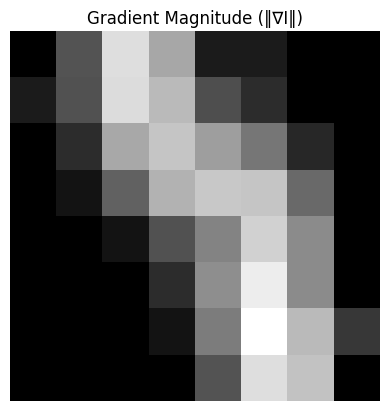

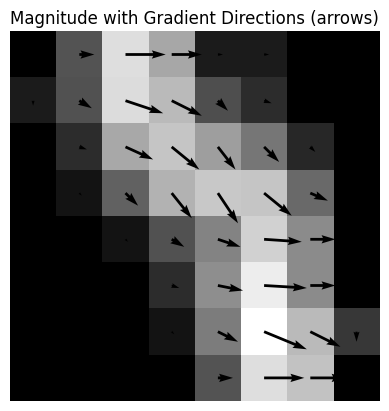

In [6]:
# Task 6 — Plot the norm (magnitude) and overlay gradient directions
import numpy as np
import cv2
from matplotlib import pyplot as plt

# If needed, re-create the cell from Task 4
cell = np.array([
    [0, 1, 2, 5, 5, 5, 5, 5],
    [0, 0, 1, 4, 4, 5, 5, 5],
    [0, 0, 1, 3, 4, 5, 5, 5],
    [0, 0, 0, 1, 2, 3, 5, 5],
    [0, 0, 0, 0, 1, 2, 5, 5],
    [0, 0, 0, 0, 1, 3, 5, 5],
    [0, 0, 0, 0, 0, 2, 5, 5],
    [0, 0, 0, 0, 0, 1, 3, 5]
], dtype="float64")

# Gradients (Task 5)
gx = cv2.Sobel(cell, cv2.CV_64F, 1, 0, ksize=3)
gy = cv2.Sobel(cell, cv2.CV_64F, 0, 1, ksize=3)
mag, ang_deg = cv2.cartToPolar(gx, gy, angleInDegrees=True)
ang_deg = np.mod(ang_deg, 180.0)  # unsigned orientation for HOG

# --- (A) Show the magnitude image ---
plt.figure()
plt.imshow(mag, cmap="gray")
plt.title("Gradient Magnitude (‖∇I‖)")
plt.axis("off")

# --- (B) Overlay arrows showing gradient direction & strength ---
# Build a grid of pixel coordinates
h, w = cell.shape
X, Y = np.meshgrid(np.arange(w), np.arange(h))

# Normalize (avoid division by zero)
eps = 1e-6
Ux = gx / (mag + eps)   # unit vector in x
Uy = gy / (mag + eps)   # unit vector in y

# Scale arrows by magnitude for visibility
scale = mag / (mag.max() + eps)

plt.figure()
plt.imshow(mag, cmap="gray")
# In image coords, y grows downward, so flip the y-component for display
plt.quiver(X, Y, Ux * scale, -Uy * scale, angles="xy", scale_units="xy", scale=1)
plt.title("Magnitude with Gradient Directions (arrows)")
plt.axis("off")

plt.show()


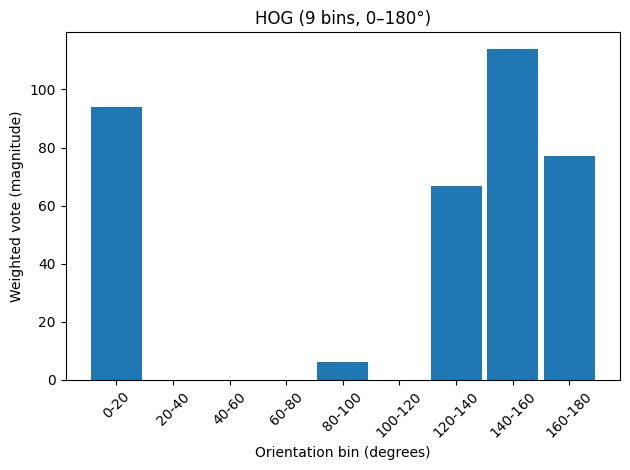

HOG vector: [ 94.      0.      0.      0.      6.      0.     66.914 113.948  77.046]


In [7]:
# Task 7 — Build a 9-bin HOG from the 'cell' and plot it
import numpy as np
import cv2
from matplotlib import pyplot as plt

# If 'cell' not in memory, re-define it from Task 4
cell = np.array([
    [0, 1, 2, 5, 5, 5, 5, 5],
    [0, 0, 1, 4, 4, 5, 5, 5],
    [0, 0, 1, 3, 4, 5, 5, 5],
    [0, 0, 0, 1, 2, 3, 5, 5],
    [0, 0, 0, 0, 1, 2, 5, 5],
    [0, 0, 0, 0, 1, 3, 5, 5],
    [0, 0, 0, 0, 0, 2, 5, 5],
    [0, 0, 0, 0, 0, 1, 3, 5]
], dtype="float64")

# Gradients
gx = cv2.Sobel(cell, cv2.CV_64F, 1, 0, ksize=3)
gy = cv2.Sobel(cell, cv2.CV_64F, 0, 1, ksize=3)
mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees=True)
ang = np.mod(ang, 180.0)  # unsigned 0..180

# 9 bins: centers at [10, 30, ..., 170], width = 20°
nbins = 9
hist, edges = np.histogram(ang, bins=nbins, range=(0,180), weights=mag)

# Plot
plt.bar(np.arange(nbins), hist, width=0.9)
plt.xticks(ticks=np.arange(nbins),
           labels=[f"{edges[i]:.0f}-{edges[i+1]:.0f}" for i in range(nbins)],
           rotation=45)
plt.title("HOG (9 bins, 0–180°)")
plt.xlabel("Orientation bin (degrees)")
plt.ylabel("Weighted vote (magnitude)")
plt.tight_layout()
plt.show()

print("HOG vector:", hist.round(3))


In [8]:
# Task 8 — Initialize the pedestrian detector (HOG + SVM)
import cv2

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

print("HOG people detector loaded.")


HOG people detector loaded.


In [10]:
# Task 9 — Open a video and read the first frame
import cv2

VIDEO_PATH = "/content/sample_data/video.mp4"   # <-- replace with your actual path

cap = cv2.VideoCapture(VIDEO_PATH)
ok, frame = cap.read()
if not ok:
    raise RuntimeError(f"Could not read a frame from: {VIDEO_PATH}")

print("Frame shape:", frame.shape)   # (H, W, 3) in BGR
cap.release()


Frame shape: (1080, 1920, 3)


✅ Frame loaded: (1080, 1920, 3)
Detections found: 5
  #0: (x=494, y=179, w=81, h=161), score=2.705
  #1: (x=300, y=166, w=93, h=185), score=2.108
  #2: (x=565, y=121, w=162, h=323), score=2.019
  #3: (x=148, y=123, w=161, h=322), score=2.765
  #4: (x=347, y=109, w=166, h=331), score=1.912


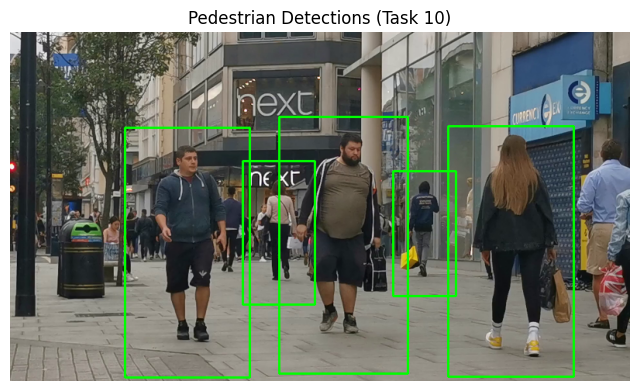

In [14]:
# Task 10 — Run detector on a single frame (with gentle pre-processing)
import cv2
import matplotlib.pyplot as plt

# --------------------------
# 1. Set up the video path
# --------------------------
VIDEO_PATH = "/content/sample_data/video.mp4"   # 🔹 change path if needed

# --------------------------
# 2. Initialize HOG detector
# --------------------------
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# --------------------------
# 3. Read first frame
# --------------------------
cap = cv2.VideoCapture(VIDEO_PATH)
ok, frame = cap.read()
cap.release()

if not ok:
    raise RuntimeError(f"❌ Failed to read first frame from {VIDEO_PATH}")

print("✅ Frame loaded:", frame.shape)

# --------------------------
# 4. Optional resize for speed
# --------------------------
scale = 800 / max(frame.shape[:2]) if max(frame.shape[:2]) > 800 else 1.0
frame_small = cv2.resize(frame, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)

# --------------------------
# 5. Detect pedestrians
# --------------------------
rects, weights = hog.detectMultiScale(
    frame_small,
    winStride=(8, 8),
    padding=(8, 8),
    scale=1.05
)

# --------------------------
# 6. Print detection info
# --------------------------
print(f"Detections found: {len(rects)}")
for i, (x, y, w, h) in enumerate(rects):
    # handle scalar or nested list
    score = float(weights[i]) if len(weights) > i else 0.0
    print(f"  #{i}: (x={x}, y={y}, w={w}, h={h}), score={score:.3f}")

# --------------------------
# 7. Draw boxes on image
# --------------------------
vis = frame_small.copy()
for (x, y, w, h) in rects:
    cv2.rectangle(vis, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert BGR → RGB for matplotlib display
vis_rgb = cv2.cvtColor(vis, cv2.COLOR_BGR2RGB)

# --------------------------
# 8. Display detections
# --------------------------
plt.figure(figsize=(8, 6))
plt.imshow(vis_rgb)
plt.title("Pedestrian Detections (Task 10)")
plt.axis("off")
plt.show()


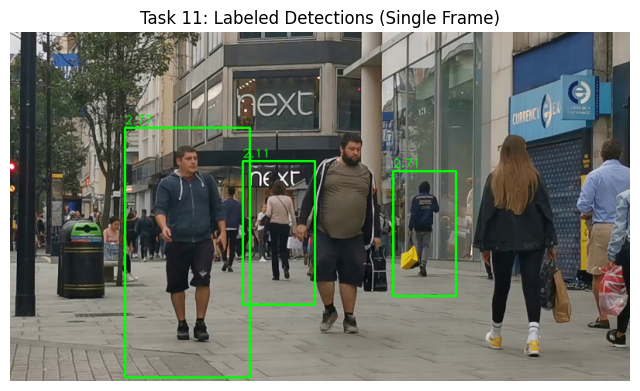

In [16]:
# Task 11 — Label and visualize detections on one frame
import cv2
import numpy as np
import matplotlib.pyplot as plt

VIDEO_PATH = "/content/sample_data/video.mp4"   # change if needed

# HOG People Detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Read one frame
cap = cv2.VideoCapture(VIDEO_PATH)
ok, frame = cap.read()
cap.release()
if not ok:
    raise RuntimeError(f"Failed to read first frame from {VIDEO_PATH}")

# Optional resize for speed
scale = 800 / max(frame.shape[:2]) if max(frame.shape[:2]) > 800 else 1.0
small = cv2.resize(frame, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)

# Detect pedestrians
rects, weights = hog.detectMultiScale(small, winStride=(8,8), padding=(8,8), scale=1.05)

# --- Apply NMS safely ---
boxes_xyxy = np.array([[x, y, x+w, y+h] for (x, y, w, h) in rects])
scores = [float(s) for s in weights]

if len(boxes_xyxy) > 0:
    keep = cv2.dnn.NMSBoxes(boxes_xyxy.tolist(), scores, score_threshold=0.0, nms_threshold=0.4)
    # handle all possible return types (list, ndarray, scalar)
    if isinstance(keep, np.ndarray):
        keep = keep.flatten().tolist()
    elif isinstance(keep, tuple):
        keep = list(keep)
    elif not isinstance(keep, (list, np.ndarray)):
        keep = [int(keep)] if keep is not None else []
else:
    keep = []

# --- Draw results ---
vis = small.copy()
indices = keep if len(keep) else range(len(rects))
for i in indices:
    x, y, w, h = rects[i]
    score = float(weights[i]) if i < len(weights) else 0.0
    cv2.rectangle(vis, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(vis, f"{score:.2f}", (x, y-5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1, cv2.LINE_AA)

# --- Display ---
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.title("Task 11: Labeled Detections (Single Frame)")
plt.axis("off")
plt.show()


In [17]:
# Task 12 — Process the entire video and save an annotated output
import cv2
import numpy as np
from time import time

VIDEO_PATH = "/content/sample_data/video.mp4"   # ← update path if needed
OUT_PATH   = "pedestrian_output.avi"

# Initialize video capture
cap = cv2.VideoCapture(VIDEO_PATH)
if not cap.isOpened():
    raise RuntimeError(f"Cannot open {VIDEO_PATH}")

fps = cap.get(cv2.CAP_PROP_FPS) or 25.0
W   = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
H   = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Initialize video writer
fourcc = cv2.VideoWriter_fourcc(*"XVID")
writer = cv2.VideoWriter(OUT_PATH, fourcc, fps, (W, H))

# Initialize HOG detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

frame_count = 0
t0 = time()

while True:
    ok, frame = cap.read()
    if not ok:
        break

    # Optional resize for faster processing
    scale = 800 / max(frame.shape[:2]) if max(frame.shape[:2]) > 800 else 1.0
    small = cv2.resize(frame, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)

    # Detect pedestrians
    rects, weights = hog.detectMultiScale(small, winStride=(8,8), padding=(8,8), scale=1.05)
    boxes_xyxy = np.array([[x, y, x+w, y+h] for (x, y, w, h) in rects])
    scores = [float(s) for s in weights]

    # --- Safe Non-Maximum Suppression ---
    keep = []
    if len(boxes_xyxy) > 0:
        raw_keep = cv2.dnn.NMSBoxes(boxes_xyxy.tolist(), scores, 0.0, 0.4)
        if isinstance(raw_keep, np.ndarray):
            keep = raw_keep.flatten().tolist()
        elif isinstance(raw_keep, (list, tuple)):
            keep = [int(i[0]) if isinstance(i, (list, tuple, np.ndarray)) else int(i)
                    for i in raw_keep]

    indices = keep if keep else range(len(rects))

    # --- Draw detections on the original frame ---
    for i in indices:
        x, y, w, h = rects[i]
        x = int(x / scale); y = int(y / scale)
        w = int(w / scale); h = int(h / scale)
        score = float(weights[i]) if i < len(weights) else 0.0
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, f"{score:.2f}", (x, y-6),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1, cv2.LINE_AA)

    writer.write(frame)
    frame_count += 1

cap.release()
writer.release()

elapsed = time() - t0
print(f"✅ Processed {frame_count} frames in {elapsed:.1f}s "
      f"({frame_count / max(elapsed, 1e-6):.1f} FPS)")
print(f"🎬 Saved annotated video to: {OUT_PATH}")


✅ Processed 378 frames in 102.9s (3.7 FPS)
🎬 Saved annotated video to: pedestrian_output.avi


In [18]:
# Inline preview (works in Jupyter/Colab)
from IPython.display import Video
Video("/content/pedestrian_output (1).avi", embed=True)
# or
Video("pedestrian_output (1).avi", embed=True)
